# CAP 5768 - Data Science - Dr. Marques - Fall 2020

# Assignment 5: Deep Learning
## STARTER CODE

### Goals 

- To learn how to use perform classification using neural networks.
- To appreciate the differences in neural network architectures for the same task -- image classification -- and dataset (MNIST, CIFAR-10).
- To learn how to implement and evaluate deep learning models in Python, using Keras and TensorFlow. 

### Instructions

- This assignment is structured in 2 parts, each using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- **The number of points is indicated next to each part. They add up to 100.**
- **There are additional (10 points worth of) bonus items**, which are, of course optional. 

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 


## Setup

### Imports


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from tensorflow.keras import layers

from matplotlib import pyplot as plt

import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## PART 1: Digit classification using MNIST

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. 

http://yann.lecun.com/exdb/mnist/


### 1a. Shallow neural network architecture

Based on https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb

#### Load and prepare the data

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [ ]:
# Model / data parameters
num_classes = 10   # 10 classified to 10
input_shape = (28, 28, 1)  # pixel size

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

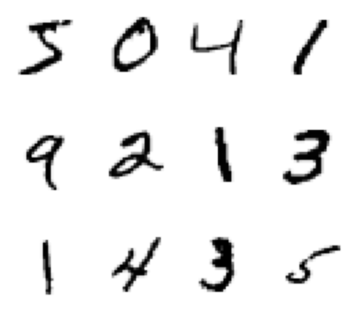

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k  ], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

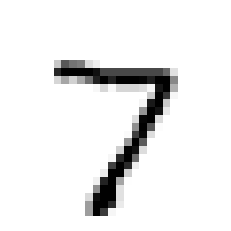

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Build your first neural network model

In [ ]:
model = Sequential() # starter
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) #neural network input 784, dense to 64  
model.add(Dense(10, activation='softmax')) #neural network input 64, dense to 10

In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

#### Configure model

In [ ]:
model.compile(
    loss='mean_squared_error', #loss fiunction
    optimizer=SGD(lr=0.01),     #Stochastic gradient descent as optimizer ,  #learning rate 
    metrics=['accuracy']
)


* different optimizers (those are algorithms) use to find the Global loss minimum Vs weight

* lower the learning rate will consume more time (higer accuracy)

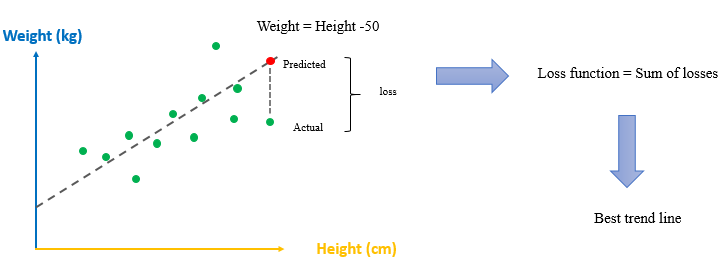

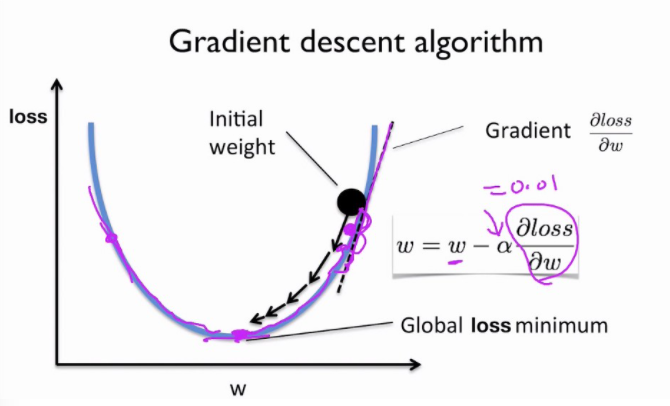

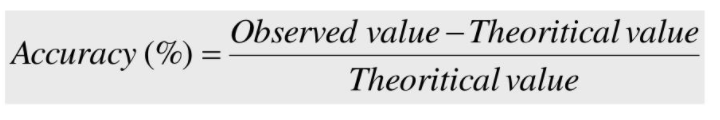

In [ ]:
batch_size=128
epochs=200    # itterations 

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.0941 - val_loss: 0.0920 - val_accuracy: 0.0986
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0916 - accuracy: 0.0946 - val_loss: 0.0911 - val_accuracy: 0.1012
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.1020 - val_loss: 0.0905 - val_accuracy: 0.1153
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.1278 - val_loss: 0.0900 - val_accuracy: 0.1630
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.1876 - val_loss: 0.0895 - val_accuracy: 0.2300
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2481 - val_loss: 0.0891 - val_accuracy: 0.2749
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.2902 - val_loss: 0.0887 - val_accuracy: 0.3083

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


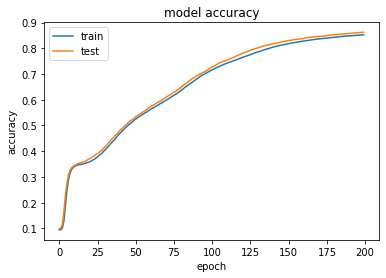

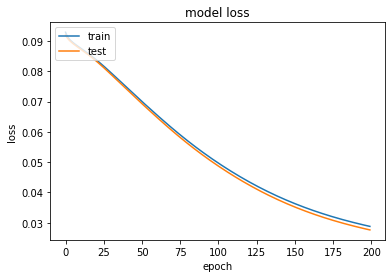

In [ ]:
# list all data in history
print(history.history.keys())

''' loss decreases and accuracy increases '''

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0276 - accuracy: 0.8623


[0.027627743780612946, 0.8622999787330627]

### 1.1 Your turn! (30 points)

1. Write code to train the same network with different options for `loss`, `optimizer`, and learning rate, for example:
```
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)
```

2. Write code to train the same network with different options for `batch_size` and number of epochs.

3. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table like this:

| Method | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline  | SGD | 0.01 | `mean_squared_error` | 128 | 200 | 0.8660 | Comparable to Naive Bayes |
| Variation #1 | ADAM | (default) | `categorical_crossentropy` | 128 | 200 | ... | Improved accuracy thanks to X |
| Variation #2 | ... | ... | `categorical_crossentropy` | 128 | 500 | ... | Improved accuracy thanks to Y |
| Variation #3 | SGD | 0.01 | `categorical_crossentropy` | 128 | 500 | ... | Improved accuracy thanks to Z |

4. Write a short paragraph summarizing what you have learned from this exercise. 

#### ANSWERS

##### variation 1

In [ ]:
# Variation #1
############# ADAM LR 0.001 (default) accuracy EPOCS 200 0.9709 comparable to SGD 
#neural network with different options
model.compile(
    loss='categorical_crossentropy', #categorical_crossentropy 
    optimizer='adam',     #adam as optimizer ,  #learning rate 
    metrics=['accuracy']  
)

#train
batch_size=128
epochs=200    # itterations 

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)



Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.3926 - accuracy: 0.8994 - val_loss: 0.2870 - val_accuracy: 0.9217
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.2652 - accuracy: 0.9266 - val_loss: 0.2338 - val_accuracy: 0.9345
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.2202 - accuracy: 0.9381 - val_loss: 0.2029 - val_accuracy: 0.9414
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1902 - accuracy: 0.9460 - val_loss: 0.1789 - val_accuracy: 0.9502
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1683 - accuracy: 0.9526 - val_loss: 0.1662 - val_accuracy: 0.9508
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1516 - accuracy: 0.9577 - val_loss: 0.1515 - val_accuracy: 0.9564
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1372 - accuracy: 0.9616 - val_loss: 0.1422 - val_accuracy: 0.9574

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


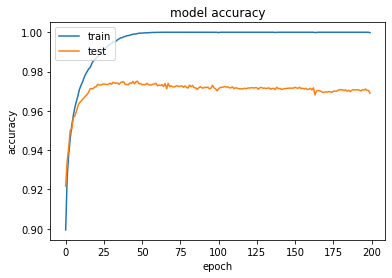

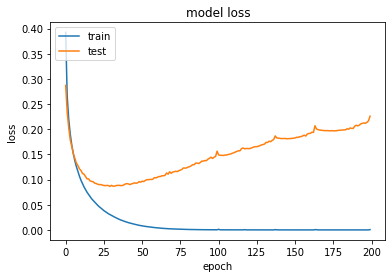

313/313 [==============================] - 1s 2ms/step - loss: 0.2259 - accuracy: 0.9690


[0.22586743533611298, 0.968999981880188]

In [ ]:
# list all data in history
print(history.history.keys())

''' loss decreases and accuracy increases '''

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.evaluate(X_validation, y_validation)

##### variation 2

In [ ]:
# Variation #2	
############# ADAM LR 0.001 (default) epoches 500 0.xxxx compaired to ADAM ittrations
#neural network with different options
model.compile(
    loss='categorical_crossentropy', #categorical_crossentropy 
    optimizer=keras.optimizers.Adam(learning_rate=0.001),     #adam as optimizer ,  #learning rate 
    metrics=['accuracy']
)

#train
batch_size=128
epochs=500   # itterations

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)


Epoch 1/500
469/469 [==============================] - 1s 3ms/step - loss: 1.0091e-04 - accuracy: 1.0000 - val_loss: 0.2211 - val_accuracy: 0.9701
Epoch 2/500
469/469 [==============================] - 1s 3ms/step - loss: 1.3779e-05 - accuracy: 1.0000 - val_loss: 0.2172 - val_accuracy: 0.9703
Epoch 3/500
469/469 [==============================] - 1s 3ms/step - loss: 5.1868e-06 - accuracy: 1.0000 - val_loss: 0.2162 - val_accuracy: 0.9708
Epoch 4/500
469/469 [==============================] - 1s 3ms/step - loss: 4.0659e-06 - accuracy: 1.0000 - val_loss: 0.2163 - val_accuracy: 0.9707
Epoch 5/500
469/469 [==============================] - 1s 3ms/step - loss: 3.5792e-06 - accuracy: 1.0000 - val_loss: 0.2165 - val_accuracy: 0.9705
Epoch 6/500
469/469 [==============================] - 1s 3ms/step - loss: 3.2167e-06 - accuracy: 1.0000 - val_loss: 0.2167 - val_accuracy: 0.9702
Epoch 7/500
469/469 [==============================] - 1s 3ms/step - loss: 2.9390e-06 - accuracy: 1.0000 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


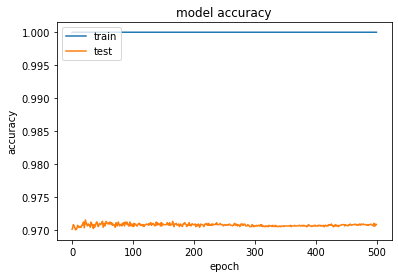

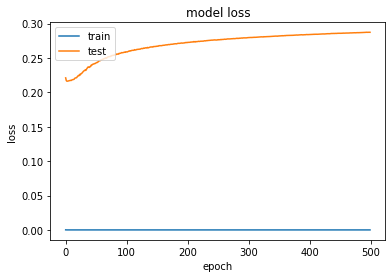

313/313 [==============================] - 1s 2ms/step - loss: 0.2873 - accuracy: 0.9708


[0.2873323857784271, 0.97079998254776]

In [ ]:
# list all data in history
print(history.history.keys())

''' loss decreases and accuracy increases '''

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.evaluate(X_validation, y_validation)

##### variation 3

In [ ]:
# Variation #3	
############# SGD LR 0.01 0.xxxx epoches 500 compared to SDG loss method
#neural network with different options
model.compile(
    loss='categorical_crossentropy', #categorical_crossentropy 
    optimizer=SGD(lr=0.01),     #Stochastic gradient descent as optimizer ,  #learning rate 
    metrics=['accuracy']
)

#train
batch_size=128
epochs=500   # itterations

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)


Epoch 1/500
469/469 [==============================] - 1s 3ms/step - loss: 1.6691e-08 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9708
Epoch 2/500
469/469 [==============================] - 1s 3ms/step - loss: 1.6691e-08 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9708
Epoch 3/500
469/469 [==============================] - 1s 3ms/step - loss: 1.6691e-08 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9708
Epoch 4/500
469/469 [==============================] - 1s 3ms/step - loss: 1.6691e-08 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9708
Epoch 5/500
469/469 [==============================] - 1s 3ms/step - loss: 1.6691e-08 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9708
Epoch 6/500
469/469 [==============================] - 1s 3ms/step - loss: 1.6691e-08 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9708
Epoch 7/500
469/469 [==============================] - 1s 3ms/step - loss: 1.6691e-08 - accuracy: 1.0000 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


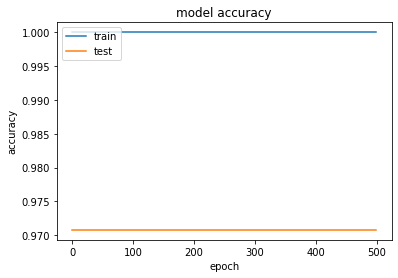

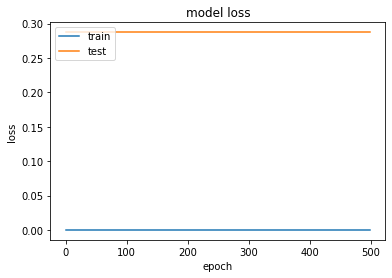

313/313 [==============================] - 1s 2ms/step - loss: 0.2873 - accuracy: 0.9708


[0.2873323857784271, 0.97079998254776]

In [ ]:
# list all data in history
print(history.history.keys())

''' loss decreases and accuracy increases '''

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.evaluate(X_validation, y_validation)

#### SUMMERY
| Method | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline  | SGD | 0.01 | `mean_squared_error` | 128 | 200 | 0.8660 | Comparable to Naive Bayes |
| Variation #1 | ADAM | (default 0.001) | `categorical_crossentropy` | 128 | 200 | 0.9690 | Improved accuracy thanks to ADAM |
| Variation #2 | ADAM | (default 0.001) | `categorical_crossentropy` | 128 | 500 | 0.9708 | ADAM high number of epochs |
| Variation #3 | SGD | 0.01 | `categorical_crossentropy` | 128 | 500 | 0.9708 | SGD  high number of epochs |

####things I learned ...

* Shallow neural network has on one layer in neural network when compared to deep learning neural network which has many of them.
* It can be changed different optimizer and loss algorithms to achieve higher accuracy even though neural network is not changed.
* model in variation-1, 200 epochs are too much , 10-25 epochs are sufficient 
* model in variation-2, 10 epochs are sufficient for learning method, more than 10 leaning it seems to be overfitting, 
* model in variation-3, its looks like SGD method works best with categorical cross entropy method than mean squared error , 
* also ADAM optimizer seems more accurate with 200 epochs than 500.  
* too much epochs are useless, it is just time consuming and expensive.



### 1b. Convolutional neural network architecture

Based on https://keras.io/examples/vision/mnist_convnet/ 

In [ ]:
#Architechture 
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

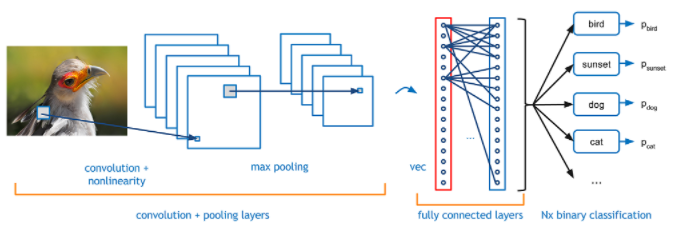

#### Configure model

In [ ]:
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

#### Prepare the data
The CNN does not expect the images to be flattened.

In [ ]:
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Train!


In [ ]:
batch_size=128
epochs=15  #set 15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3487 - accuracy: 0.8932 - val_loss: 0.0905 - val_accuracy: 0.9712
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1093 - accuracy: 0.9668 - val_loss: 0.0568 - val_accuracy: 0.9825
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0819 - accuracy: 0.9744 - val_loss: 0.0438 - val_accuracy: 0.9856
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0689 - accuracy: 0.9786 - val_loss: 0.0461 - val_accuracy: 0.9850
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0607 - accuracy: 0.9811 - val_loss: 0.0336 - val_accuracy: 0.9889
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0538 - accuracy: 0.9828 - val_loss: 0.0345 - val_accuracy: 0.9889
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0309 - val_accuracy: 0.9890
Epoch 

#### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


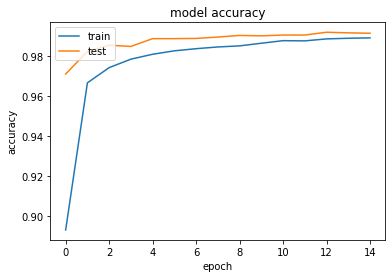

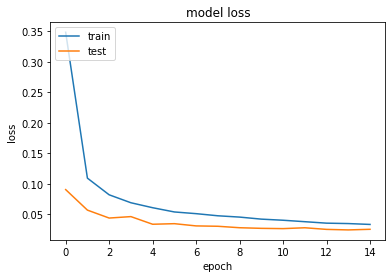

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### Evaluate the model

In [ ]:
model_cnn.evaluate(X_valid_cnn, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9916


[0.025303397327661514, 0.991599977016449]

### 1.2 Your turn! (30 points)

1. Write code to train the same network with different options for `loss`, `optimizer`, learning rate,  `batch_size` and number of epochs.

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table similar to the one for item 1.1.

3. Write a short paragraph summarizing what you have learned from this exercise. 

####ANSWERS 

##### V1

In [ ]:
####configure the model_cnn

# Variation #1
############# ADAM LR 0.001 (default) batch_size=128 accuracy 0.9709 batch_size=64
#neural network with different options
model.compile(
    loss='categorical_crossentropy', #categorical_crossentropy 
    optimizer='adam',     #adam as optimizer ,  #learning rate 
    metrics=['accuracy']  
)


####images were flattened above ###

####Trainig

batch_size=64
epochs=15  #set 15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)


Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0369 - accuracy: 0.9881 - val_loss: 0.0269 - val_accuracy: 0.9906
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0304 - val_accuracy: 0.9903
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0242 - val_accuracy: 0.9922
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.0224 - val_accuracy: 0.9926
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0233 - val_accuracy: 0.9918
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0210 - val_accuracy: 0.9925
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.0240 - val_accuracy: 0.9924
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


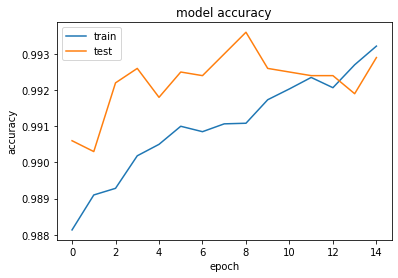

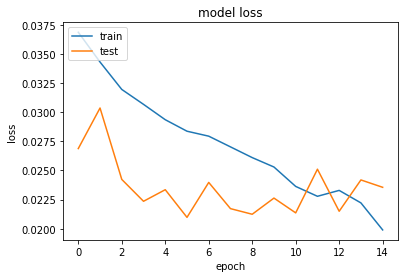

313/313 [==============================] - 1s 2ms/step - loss: 0.0236 - accuracy: 0.9929


[0.023551611229777336, 0.992900013923645]

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
####accuracy
model_cnn.evaluate(X_valid_cnn, y_validation)

##### V2

In [ ]:
# Variation #2	
############# SGD LR 0.01 batch_size=128 0.xxxx compared to SDG loss method
#neural network with different options
model.compile(
    loss='mean_squared_error', #mean_squared_error 
    optimizer=SGD(lr=0.01),     #Stochastic gradient descent as optimizer ,  #learning rate 
    metrics=['accuracy']
)

####images were flattened above ###

####Trainig

batch_size=128
epochs=15  #set 15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0228 - val_accuracy: 0.9924
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0235 - val_accuracy: 0.9926
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0219 - val_accuracy: 0.9931
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0169 - accuracy: 0.9940 - val_loss: 0.0212 - val_accuracy: 0.9933
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0255 - val_accuracy: 0.9931
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0214 - val_accuracy: 0.9933
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0225 - val_accuracy: 0.9928
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


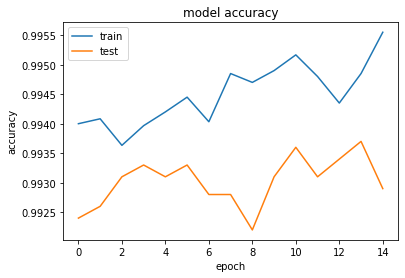

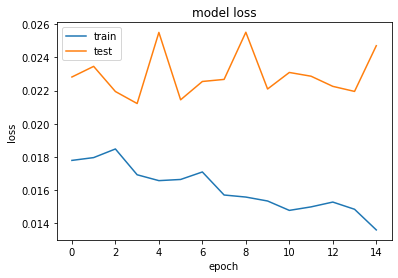

313/313 [==============================] - 1s 2ms/step - loss: 0.0247 - accuracy: 0.9929


[0.024700339883565903, 0.992900013923645]

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
####accuracy
model_cnn.evaluate(X_valid_cnn, y_validation)

##### V3

In [ ]:
# Variation #3
############# SGD LR 0.01 batch_size=128 0.xxxx compared to SDG loss method
#neural network with different options
model.compile(
    loss='categorical_crossentropy', #categorical_crossentropy
    optimizer=SGD(lr=0.01),     #Stochastic gradient descent as optimizer ,  #learning rate 
    metrics=['accuracy']
)

####images were flattened above ###

####Trainig

batch_size=128
epochs=15  #set 15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0206 - val_accuracy: 0.9938
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0228 - val_accuracy: 0.9928
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0124 - accuracy: 0.9955 - val_loss: 0.0224 - val_accuracy: 0.9929
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0218 - val_accuracy: 0.9933
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.0238 - val_accuracy: 0.9926
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0240 - val_accuracy: 0.9932
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0220 - val_accuracy: 0.9930
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


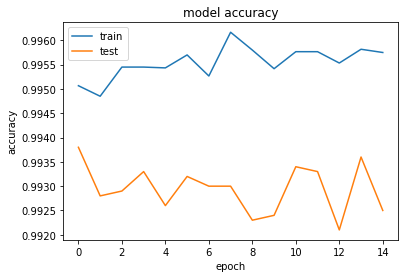

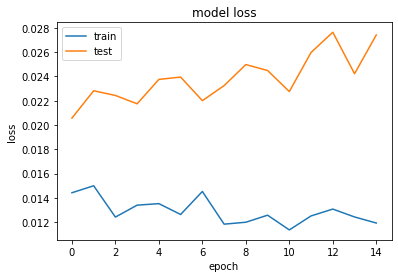

313/313 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.9925


[0.027422750368714333, 0.9925000071525574]

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####accuracy
model_cnn.evaluate(X_valid_cnn, y_validation)

#### SUMMERY
| Method | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline | ADAM | (default 0.001) | `categorical_crossentropy` | 128 | 15 |  0.9916 | Improved accuracy thanks to ADAM |
| Variation #1 | ADAM | (default 0.001) | `categorical_crossentropy` | 64 | 15 | 0.9929 | Improved accuracy due to lower batch size |
| Variation #2  | SGD | 0.01 | `mean_squared_error` | 128 | 15 | 0.9929 | Improved accuracy compared to adam |
| Variation #3 | SGD | 0.01 | `categorical_crossentropy` | 128 | 15 | 0.9925 | Improved accuracy compared mean squred error |

* convolutional neural network has structure in a way that one layer is connected to all neurons in the next layer.

* when ADAM optimizer used in convolutional neural training method, batch size (128 and 64) has an very insignigicat affect for validation accuracy, also SGD and ADAM optimizer do not have significant differcence in validation accuracy.
It can assume differentiating  the neural network is the key to higher accuracy


### 1.3 BONUS! (10 points)

1. Change the architecture of the CNN (number of layers, use of (and amount of) Dropout,  conv2D layers' [parameters](https://keras.io/api/layers/convolution_layers/convolution2d/) (stride, padding, kernel size, etc.), type and parameters of [pooling layers](https://https://keras.io/api/layers/pooling_layers/), etc.)

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table similar to the one for item 1.1.

3. Write a short paragraph summarizing what you have learned from this exercise. 

#### ANWSERS

##### V_1 

In [ ]:
######V1########
#######Architechture ###########
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(4, 4)),                     ## pooling size increased, number of parameters decresed 
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(4, 4)),                     ## pooling size increased, number of parameters decresed 
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

######configure the model ########
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

In [ ]:
##########preprare the data ###########
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
########### train ############
batch_size=128
epochs=15  #set 15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.9684 - accuracy: 0.6954 - val_loss: 0.2210 - val_accuracy: 0.9504
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3610 - accuracy: 0.8900 - val_loss: 0.1288 - val_accuracy: 0.9671
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2760 - accuracy: 0.9150 - val_loss: 0.0965 - val_accuracy: 0.9714
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2369 - accuracy: 0.9277 - val_loss: 0.0840 - val_accuracy: 0.9748
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2135 - accuracy: 0.9351 - val_loss: 0.0732 - val_accuracy: 0.9788
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2007 - accuracy: 0.9387 - val_loss: 0.0679 - val_accuracy: 0.9798
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1866 - accuracy: 0.9431 - val_loss: 0.0658 - val_accuracy: 0.9812
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


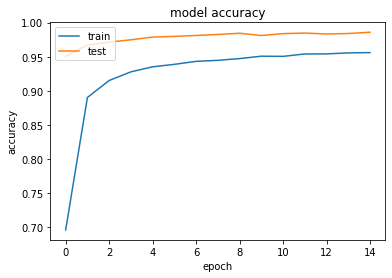

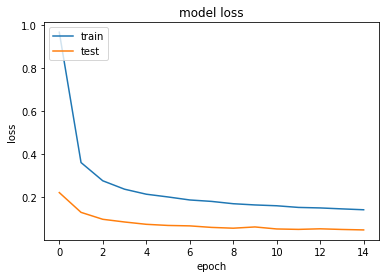

313/313 [==============================] - 1s 2ms/step - loss: 0.0470 - accuracy: 0.9859


[0.047015003859996796, 0.9858999848365784]

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model_cnn.evaluate(X_valid_cnn, y_validation)

##### V_2

In [ ]:
##V2###################

#######Architechture ###########
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", strides=(2, 2)),     ## strides=(2, 2) added
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),                     ## pooling size = baseline 
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", strides=(2, 2)),     ## strides=(2, 2) added
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),                     ## pooling size = baseline  
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

######configure the model ########
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 256)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [ ]:
##########preprare the data ###########
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
########### train ############
batch_size=128
epochs=15  #set 15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.7364 - accuracy: 0.7652 - val_loss: 0.2136 - val_accuracy: 0.9416
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2766 - accuracy: 0.9168 - val_loss: 0.1324 - val_accuracy: 0.9614
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2135 - accuracy: 0.9362 - val_loss: 0.1051 - val_accuracy: 0.9687
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1831 - accuracy: 0.9447 - val_loss: 0.0932 - val_accuracy: 0.9705
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1640 - accuracy: 0.9498 - val_loss: 0.0799 - val_accuracy: 0.9752
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1477 - accuracy: 0.9552 - val_loss: 0.0743 - val_accuracy: 0.9760
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1398 - accuracy: 0.9574 - val_loss: 0.0705 - val_accuracy: 0.9795
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


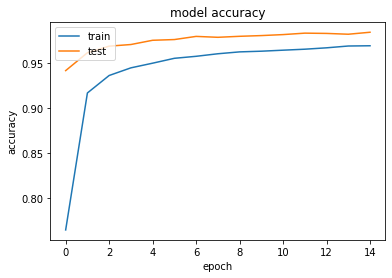

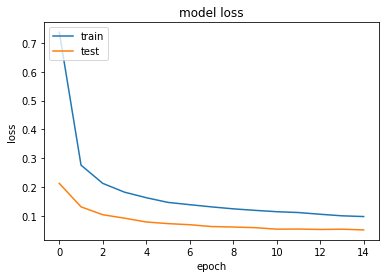

313/313 [==============================] - 1s 2ms/step - loss: 0.0525 - accuracy: 0.9841


[0.05252173915505409, 0.9840999841690063]

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model_cnn.evaluate(X_valid_cnn, y_validation)

##### V_3 

In [ ]:
##V3###################

#######Architechture ###########
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(2, 2), activation="relu", strides=(2, 2)),     ## kernel_size=(2, 2) strides=(2, 2) added
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),                        ## pooling size = baseline 
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu", strides=(2, 2)),     ## kernel_size=(2, 2)  strides=(2, 2) added
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),                        ## pooling size = baseline  
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu", strides=(2, 2)),     ## 3 layers kernel_size=(2, 2) strides=(2, 2) added
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),                        ## 3 layers pooling size = baseline  
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

######configure the model ########
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 14, 14, 32)        160       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 3, 3, 64)          8256      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 1, 1, 64)          16448     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 64)              

In [ ]:
##########preprare the data ###########
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
########### train ############
batch_size=128
epochs=15  #set 15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.9023 - accuracy: 0.7050 - val_loss: 0.3214 - val_accuracy: 0.8998
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.4378 - accuracy: 0.8644 - val_loss: 0.2173 - val_accuracy: 0.9344
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.3432 - accuracy: 0.8958 - val_loss: 0.1704 - val_accuracy: 0.9445
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2966 - accuracy: 0.9114 - val_loss: 0.1445 - val_accuracy: 0.9526
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2650 - accuracy: 0.9186 - val_loss: 0.1330 - val_accuracy: 0.9557
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2433 - accuracy: 0.9258 - val_loss: 0.1221 - val_accuracy: 0.9607
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2269 - accuracy: 0.9314 - val_loss: 0.1129 - val_accuracy: 0.9620
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


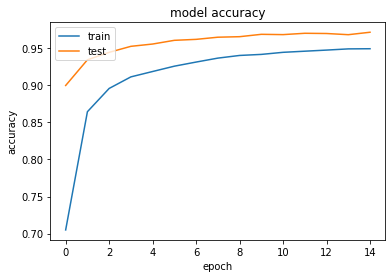

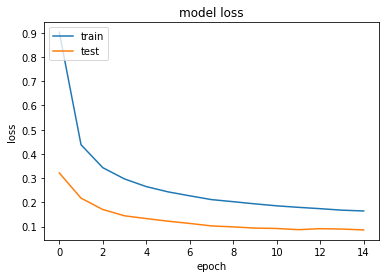

313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9716


[0.08614778518676758, 0.9715999960899353]

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model_cnn.evaluate(X_valid_cnn, y_validation)

#### SUMMERY

| Method | layers | parameters | CNN / Kernal_size / activation /  strides / pool size | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline | 2  | 34,826 | kernel_size=(3, 3) / activation="relu" / strides =(1,1) -default / pool_size=(2, 2)  |  ADAM | (default 0.001) | `categorical_crossentropy` | 128 | 15 | 0.9916| Highest  number of parameter |
| Variation #1 | 2  | 19,466 | kernel_size=(3, 3) / activation="relu" / strides =(1,1)-default / pool_size=(4, 4)  |  ADAM | (default 0.001) | `categorical_crossentropy` | 128 | 15 | 0.9859 | pool size chaged accuracy decreased |
| Variation #2 | 2  | 21,386 | kernel_size=(3, 3) / activation="relu" / strides =(2,2)- added/ pool_size=(2, 2)  |  ADAM | (default 0.001)  | `categorical_crossentropy` | 128 | 15 | 0.9841 | strides =(2,2) accuracy decreased |
| Variation #2 | 3  | 25,514 | kernel_size=(2, 2) / activation="relu" / strides =(2,2)-added /  pool_size=(2, 2)  |  ADAM | (default 0.001)  | `categorical_crossentropy` | 128 | 15 | 0.9716 | strides =(2,2) , 3  layers accuracy decreased |

**Things learned **
* increasing parameters or layers may or may not increase the accuracy.


## PART 2: Image classification using the CIFAR-10 dataset
  
In this project you will design and implement a deep learning solution for image classification using the CIFAR-10 dataset.

https://www.cs.toronto.edu/~kriz/cifar.html 


See also:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


### Setup

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

### Load and prepare the data

In [ ]:
# Load the dataset
(x_training, y_training), (x_testing, y_testing) = cifar10.load_data()

num_classes = 10 

# Normalize the image data
x_train = x_training.astype("float32") / 255.0
y_training = np.squeeze(y_training)
x_test = x_testing.astype("float32") / 255.0
y_testing = np.squeeze(y_testing)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_training, num_classes)
y_test = keras.utils.to_categorical(y_testing, num_classes)

170500096/170498071 [==============================] - 2s 0us/step


### Explore the data

In [ ]:
# Number of samples
print("Number of training samples: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training samples:  50000
Number of test samples:  10000


In [ ]:
# Number of classes
num_classes = y_test.shape[1]
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


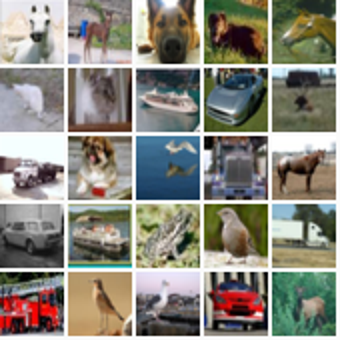

In [ ]:
# Show collage of 25 (randomly selected) images

# Every time you run this cell, you should see 25 different images. 
# That's fine (and desired, actually).

height_width = 32

def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_training[0]
print(idx)

6


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

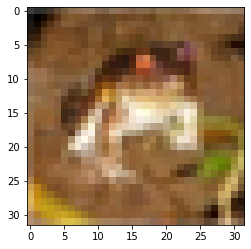

In [ ]:
plt.imshow(x_train[0])

### 2a. Baseline model

Let's start by using a convolutional neural network (CNN) built from scratch as a baseline.


#### Build and configure the model

In [ ]:
batch_size = 128
epochs = 40 # change to 40
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 15, 15, 64)      

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#### Train the model

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/40
391/391 [==============================] - 5s 12ms/step - loss: 1.9788 - accuracy: 0.2718 - val_loss: 1.7590 - val_accuracy: 0.3660
Epoch 2/40
391/391 [==============================] - 4s 11ms/step - loss: 1.7044 - accuracy: 0.3824 - val_loss: 1.6373 - val_accuracy: 0.4142
Epoch 3/40
391/391 [==============================] - 4s 11ms/step - loss: 1.5970 - accuracy: 0.4194 - val_loss: 1.5083 - val_accuracy: 0.4539
Epoch 4/40
391/391 [==============================] - 4s 11ms/step - loss: 1.5142 - accuracy: 0.4524 - val_loss: 1.4738 - val_accuracy: 0.4752
Epoch 5/40
391/391 [==============================] - 4s 11ms/step - loss: 1.4373 - accuracy: 0.4855 - val_loss: 1.3335 - val_accuracy: 0.5237
Epoch 6/40
391/391 [==============================] - 4s 11ms/step - loss: 1.3736 - accuracy: 0.5062 - val_loss: 1.2893 - val_accuracy: 0.5383
Epoch 7/40
391/391 [==============================] - 4s 11ms/step - loss: 1.3255 - accuracy: 0.5271 - val_loss: 1.2222 - val_accuracy: 0.5642

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


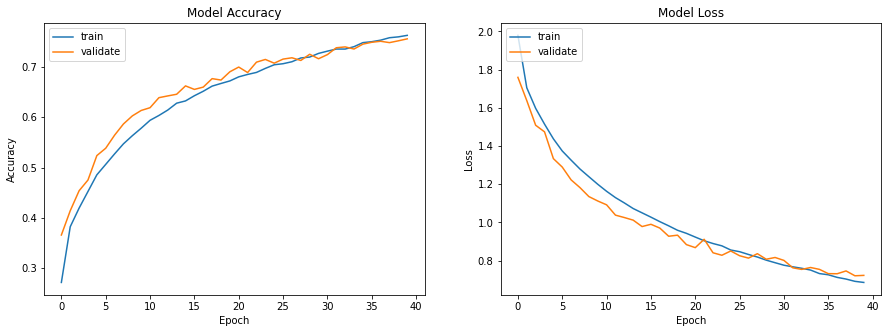

In [ ]:
plotmodelhistory(history)

#### Evaluate the model

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7224 - accuracy: 0.7555
Test loss: 0.7223803400993347
Test accuracy: 0.7555000185966492


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

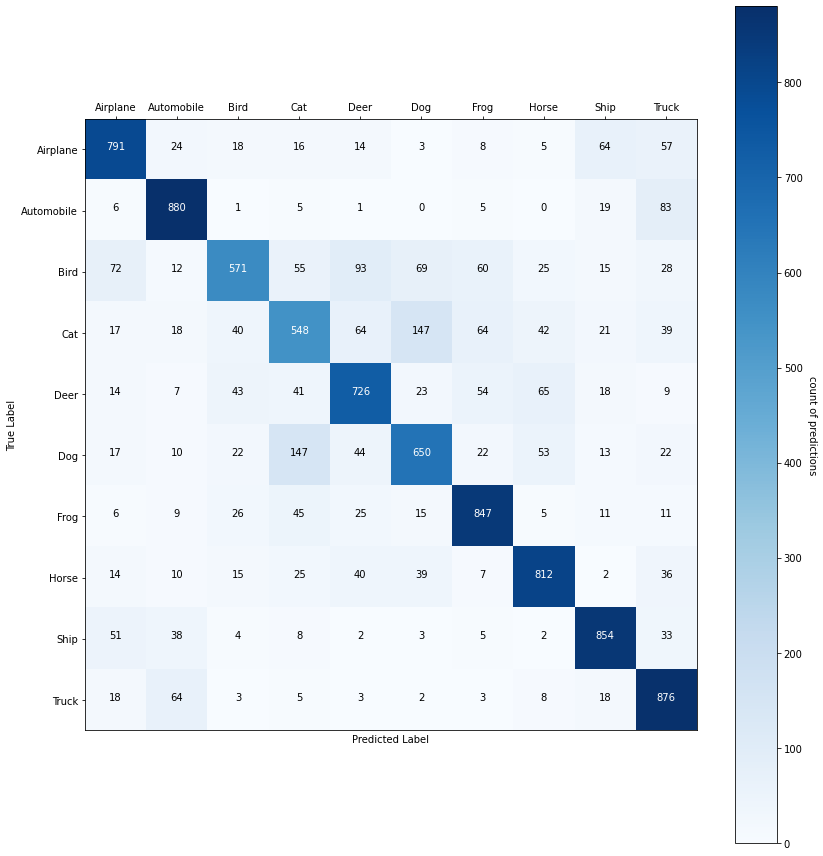

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.82      0.88      0.85      1000
           2       0.77      0.57      0.66      1000
           3       0.61      0.55      0.58      1000
           4       0.72      0.73      0.72      1000
           5       0.68      0.65      0.67      1000
           6       0.79      0.85      0.82      1000
           7       0.80      0.81      0.81      1000
           8       0.83      0.85      0.84      1000
           9       0.73      0.88      0.80      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



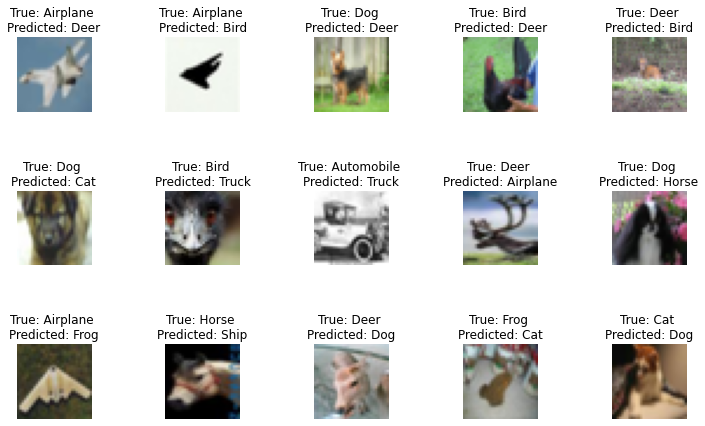

In [ ]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


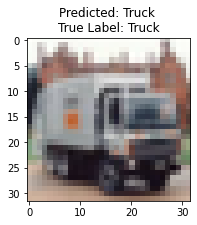

In [ ]:
show_test(11);

### 2b. Transfer Learning

Now we will see how we could use a [pretrained (on ImageNet) model](https://https://keras.io/api/applications/) to perform the same task (image classification) using a different dataset (CIFAR-10), using the *transfer learning* paradigm.

See:

https://www.kaggle.com/adi160/cifar-10-keras-transfer-learning

https://keras.io/guides/transfer_learning/

#### Transfer Learning: setup

In [ ]:
from keras import Sequential
from keras.applications import VGG19,ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


#### Attempt #1: using ResNet50 as a base model 

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50 

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',    # already trained
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_27 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 4000)              8196000   
_________________________________________________________________
dense_36 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_37 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_38 (Dense)             (None, 500)               500500    
______________________________________________________

In [ ]:
batch_size= 128
epochs=10 # change to 10
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 23s 84ms/step - loss: 1.5511 - accuracy: 0.4558 - val_loss: 1.1691 - val_accuracy: 0.5934
Epoch 2/10
274/274 [==============================] - 22s 78ms/step - loss: 0.8667 - accuracy: 0.6970 - val_loss: 0.8804 - val_accuracy: 0.6935
Epoch 3/10
274/274 [==============================] - 21s 78ms/step - loss: 0.5969 - accuracy: 0.7883 - val_loss: 0.9767 - val_accuracy: 0.6813
Epoch 4/10
274/274 [==============================] - 21s 78ms/step - loss: 0.4193 - accuracy: 0.8541 - val_loss: 0.8842 - val_accuracy: 0.7189
Epoch 5/10
274/274 [==============================] - 21s 78ms/step - loss: 0.2881 - accuracy: 0.8992 - val_loss: 0.9389 - val_accuracy: 0.7275
Epoch 6/10
274/274 [==============================] - 21s 78ms/step - loss: 0.2098 - accuracy: 0.9293 - val_loss: 1.0061 - val_accuracy: 0.7283
Epoch 7/10
274/274 [==============================] - 21s 78ms/step - loss: 0.1489 - accuracy: 0.9499 - val_loss: 1.0661 - val_accuracy:

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


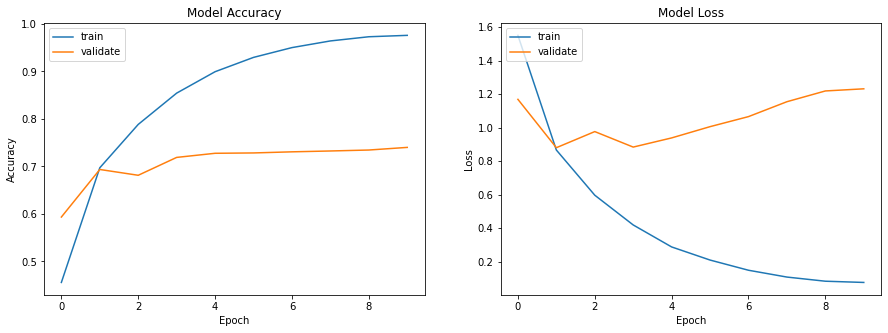

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.2482 - accuracy: 0.7447
Test loss: 1.248197317123413
Test accuracy: 0.744700014591217


In [ ]:
  def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
y_pred=model_1.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

Confusion matrix, without normalization


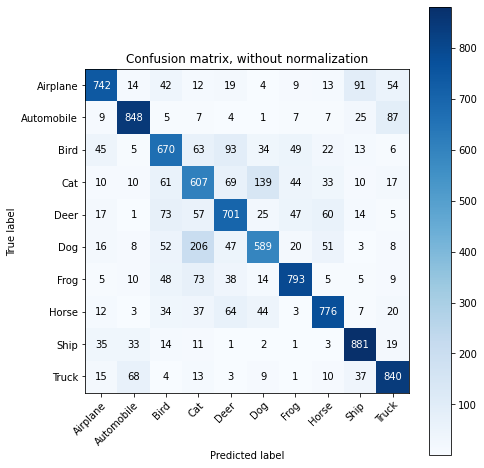

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


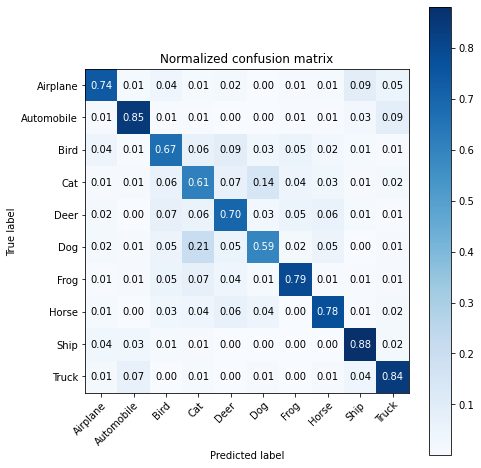

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

### 2.1 Your turn! (30 points)

1. Write code to build, train, and evaluate at least three additional transfer learning models and combinations of (hyper)parameters.

Here are a few things you could do:
*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table like this:

| Method | Base model | Relevant (hyper)parameters | Test loss | Test accuracy | Remarks |
| --- | --- | --- | --- | --- | --- |
| Baseline  | ResNet50 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 | 0.7526 | Baseline |
| Variation #1 | ... | ... | ... | ... | Improved accuracy thanks to X |
| Variation #2 | ... | ... | ... | ... | Improved accuracy thanks to Y |
| Variation #3 | ... | ... | ... | ... | Improved accuracy thanks to Z |

3. Write a short paragraph summarizing what you have learned from this exercise. 









####ANSWERS


##### using VGG16 pre-trained classification model

pre prained models : https://keras.io/api/applications/

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG19()

base_model_1 = VGG19(include_top=False,
                        weights='imagenet',    # already trained
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_28 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 4000)              2052000   
_________________________________________________________________
dense_41 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_42 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_43 (Dense)             (None, 500)               500500    
______________________________________________________

In [ ]:
batch_size= 128 #change to 128
epochs=10 # change to 10
learn_rate=0.001 #change to 0.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 22s 80ms/step - loss: 1.9587 - accuracy: 0.2802 - val_loss: 1.6332 - val_accuracy: 0.4221
Epoch 2/10
274/274 [==============================] - 21s 78ms/step - loss: 1.1628 - accuracy: 0.5896 - val_loss: 0.8056 - val_accuracy: 0.7298
Epoch 3/10
274/274 [==============================] - 21s 78ms/step - loss: 0.7036 - accuracy: 0.7613 - val_loss: 0.6825 - val_accuracy: 0.7697
Epoch 4/10
274/274 [==============================] - 21s 78ms/step - loss: 0.5602 - accuracy: 0.8080 - val_loss: 0.6794 - val_accuracy: 0.7753
Epoch 5/10
274/274 [==============================] - 21s 78ms/step - loss: 0.4496 - accuracy: 0.8479 - val_loss: 0.5764 - val_accuracy: 0.8083
Epoch 6/10
274/274 [==============================] - 21s 78ms/step - loss: 0.3721 - accuracy: 0.8715 - val_loss: 0.5720 - val_accuracy: 0.8170
Epoch 7/10
274/274 [==============================] - 21s 78ms/step - loss: 0.3003 - accuracy: 0.8971 - val_loss: 0.5314 - val_accuracy:

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.7512 - accuracy: 0.8074
Test loss: 0.7511690855026245
Test accuracy: 0.8073999881744385


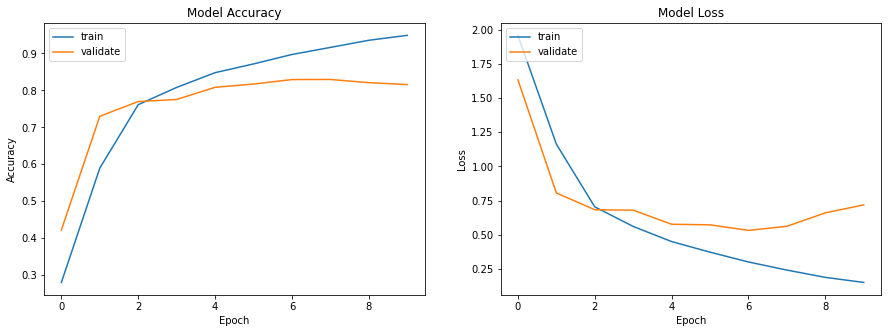

In [ ]:
plotmodelhistory(history_1)

Confusion matrix, without normalization


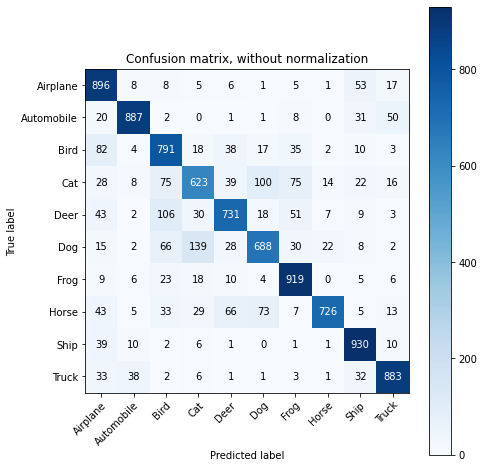

In [ ]:
y_pred=model_1.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

##### using DenseNet201 pre-trained classification model

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet201
model = DenseNet201()

base_model_1 = DenseNet201(include_top=False,
                        weights='imagenet',    # already trained
                        input_shape=(32,32,3),
                        classes=10)

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

74842112/74836368 [==============================] - 1s 0us/step
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1, 1, 1920)        18321984  
_________________________________________________________________
flatten_29 (Flatten)         (None, 1920)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 4000)              7684000   
_________________________________________________________________
dense_46 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_47 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_48 (Dense)             (None, 500)               500500    
______________________________________________________

In [ ]:
batch_size= 128 #change to 128
epochs=10 # change to 10
learn_rate=0.001 #change to 0.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 34s 123ms/step - loss: 1.6722 - accuracy: 0.4301 - val_loss: 1.0714 - val_accuracy: 0.6353
Epoch 2/10
274/274 [==============================] - 28s 102ms/step - loss: 0.7726 - accuracy: 0.7318 - val_loss: 0.7538 - val_accuracy: 0.7403
Epoch 3/10
274/274 [==============================] - 28s 101ms/step - loss: 0.5008 - accuracy: 0.8277 - val_loss: 0.6824 - val_accuracy: 0.7680
Epoch 4/10
274/274 [==============================] - 28s 101ms/step - loss: 0.3218 - accuracy: 0.8907 - val_loss: 0.7153 - val_accuracy: 0.7764
Epoch 5/10
274/274 [==============================] - 28s 102ms/step - loss: 0.1973 - accuracy: 0.9340 - val_loss: 0.7692 - val_accuracy: 0.7765
Epoch 6/10
274/274 [==============================] - 28s 101ms/step - loss: 0.1152 - accuracy: 0.9633 - val_loss: 0.8901 - val_accuracy: 0.7642
Epoch 7/10
274/274 [==============================] - 28s 101ms/step - loss: 0.0735 - accuracy: 0.9767 - val_loss: 0.8828 - val_ac

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.0147 - accuracy: 0.7899
Test loss: 1.0147395133972168
Test accuracy: 0.789900004863739


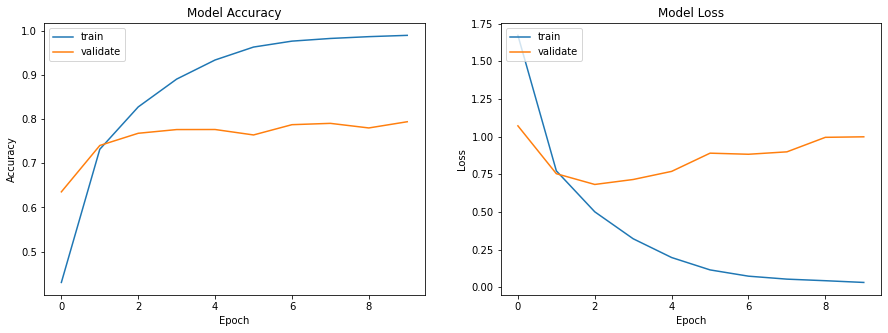

In [ ]:
plotmodelhistory(history_1)

Confusion matrix, without normalization


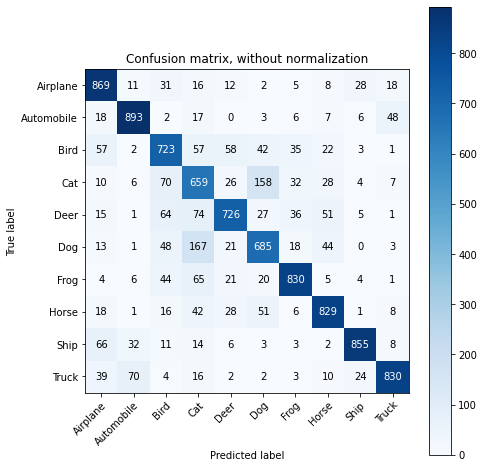

In [ ]:
y_pred=model_1.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

##### using EfficientNetB7 pre-trained classification model

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
model = EfficientNetB7()

base_model_1 = EfficientNetB7(include_top=False,
                        weights='imagenet',    # already trained
                        input_shape=(32,32,3),
                        classes=10)

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

258080768/258076736 [==============================] - 1s 0us/step
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 1, 1, 2560)        64097687  
_________________________________________________________________
flatten_30 (Flatten)         (None, 2560)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 4000)              10244000  
_________________________________________________________________
dense_51 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_52 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_53 (Dense)             (None, 500)               500500    
____________________________________________________

In [ ]:
batch_size= 128 #change to 128
epochs=10 # change to 10
learn_rate=0.001 #change to 0.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 75s 275ms/step - loss: 2.2424 - accuracy: 0.1765 - val_loss: 2.1403 - val_accuracy: 0.2308
Epoch 2/10
274/274 [==============================] - 70s 254ms/step - loss: 1.9338 - accuracy: 0.3065 - val_loss: 1.6862 - val_accuracy: 0.3972
Epoch 3/10
274/274 [==============================] - 69s 253ms/step - loss: 1.5816 - accuracy: 0.4271 - val_loss: 1.4292 - val_accuracy: 0.4817
Epoch 4/10
274/274 [==============================] - 69s 253ms/step - loss: 1.3390 - accuracy: 0.5141 - val_loss: 1.2570 - val_accuracy: 0.5480
Epoch 5/10
274/274 [==============================] - 69s 253ms/step - loss: 1.1649 - accuracy: 0.5823 - val_loss: 1.1528 - val_accuracy: 0.5849
Epoch 6/10
274/274 [==============================] - 69s 253ms/step - loss: 1.0252 - accuracy: 0.6338 - val_loss: 1.0701 - val_accuracy: 0.6213
Epoch 7/10
274/274 [==============================] - 69s 253ms/step - loss: 0.9238 - accuracy: 0.6699 - val_loss: 0.9998 - val_ac

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 12s 37ms/step - loss: 0.8932 - accuracy: 0.6915
Test loss: 0.8931751847267151
Test accuracy: 0.6915000081062317


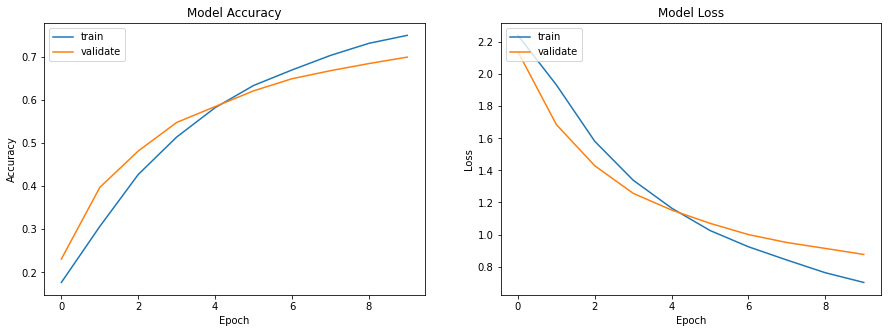

In [ ]:
plotmodelhistory(history_1)

Confusion matrix, without normalization


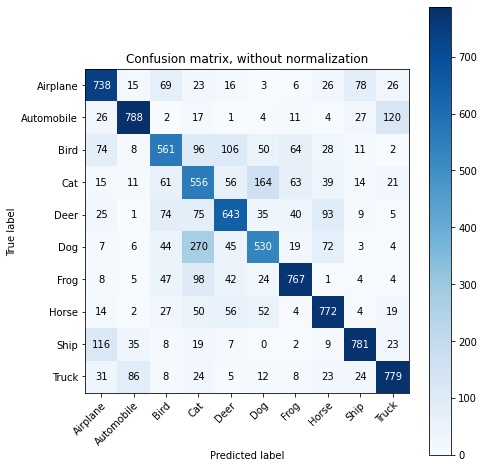

In [ ]:
y_pred=model_1.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

#### SUMMERY
| Method | Base model | Relevant (hyper)parameters | Test loss | Test accuracy | Remarks |
| --- | --- | --- | --- | --- | --- |
| Baseline  | ResNet50 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 | 0.7447 | Baseline |
| Variation #1 |VGG19 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 |  0.8074  | Improved accuracy thanks to VGG19 |
| Variation #2 | DenseNet121 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 | 0.7899  | Improved accuracy in DenseNet121 |
| Variation #3 | EfficientNetB7 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 | 0.6915  | Decreased accuracy in EfficientNetB7 |




##### Things Learned
**Things learned **

* convolutional neural network has structure as one layer is connected to all neurons in the next layer.
* Different type of pre-trained models lead to diffrent accuracy.

### Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

**Things learned **

* neural network classification,
* CIFAR data set
* shallow neural network vs  convolutional neural network
* Different methods of building a nural network
* model configurations (MSErorr, SGD, ADAM, learning rate,categorical crossentropy)
* Evaluation of NN method
* pre traind models (transfer learning)
* how to summerize and write NN comparison.
* increasing parameters or layers may or may not increase the validation accuracy.

The most fun part was investigating trained data, time concuming part was understanding the manipulating python codes, elnglisting part was understanding nural networks, tedious part is understanding the neural network python codes.
If I had additional week I would look into mathamatical side of the neural network.

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks


!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to html nkumarachchi2019_CAP5768_Fall2020_Assignment5_STARTER.ipynb


/content/drive/MyDrive/Colab Notebooks
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-generic-recommended is already the newest version (2017.20180305-1).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
[NbConvertApp] Converting notebook nkumarachchi2019_CAP5768_Fall2020_Assignment5_STARTER.ipynb to html
[NbConvertApp] Writing 2654779 bytes to nkumarachchi2019_CAP5768_Fall2020_Assignment5_STARTER.html
